In [1]:
#con este script voy a ver cuáles son los extremos para el ploteo de mis cuencas

In [3]:
#Importo las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize 
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import geopandas as gpd

In [1]:
#busco los .shp que quiero plotear
workspace = '/Users/naranjax/Documents/Facultad/'
shapeCuencaSalado = f"{workspace}tesis/datos/shapes/salado-santafe/salado-santafe.shp"
shapeCuencaBajosSubmeridionales = f"{workspace}tesis/datos/shapes/bajos-submeridionales/bajos-submeridionales.shp"
shapeCuencaJuramento  = f"{workspace}tesis/datos/shapes/juramento/juramento.shp"
shapeCuencaJuramentoAltoSalta  = f"{workspace}tesis/datos/shapes/juramento/juramento-alto-salta.shp"
shapeCuencaJuramentoMedioSalta  = f"{workspace}tesis/datos/shapes/juramento/juramento-medio-salta.shp"

cuencas = [shapeCuencaSalado, shapeCuencaJuramento, shapeCuencaBajosSubmeridionales]
cuencasNombre = ['Cuenca Salado', "Cuenca Juramento", "Cuenca Bajos Submeridionales"]


In [4]:
#cargamos los límites de los países y de las provincias
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='gray')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='black')

In [6]:
!pwd

/Users/naranjax/Facultad/tesis/scripts


In [7]:
#Abro los archivos .shp 
cuencaSaladoGeo = gpd.read_file(shapeCuencaSalado)
cuencaBajosGeo = gpd.read_file(shapeCuencaBajosSubmeridionales)
cuencaJuramentoGeo = gpd.read_file(shapeCuencaJuramento)
cuencaJuramentoAltoSaltaGeo = gpd.read_file(shapeCuencaJuramentoAltoSalta)
cuencaJuramentoMedioSaltaGeo = gpd.read_file(shapeCuencaJuramentoMedioSalta)
#cuencaSaladoGeo
#cuencaBajosGeo
#cuencaJuramentoGeo
#ubicacionEstaciones = pd.read_csv(f'{workspace}tesis/datos/shapes/ubicacion-estaciones.txt', sep="\t")
ubicacionEstaciones = pd.read_csv('../datos/datosAlturaDeRio.csv')

In [10]:
ubicacionEstaciones

,sitecode,nombre,distrito,pais,tipo,tipo_nombre,propietario,id_externo,url,var,...,abrev,lon,lat,cero_ign,automatica,rio,real,nivel_de_alerta,nivel_de_evacuacion,nivel_de_aguas_bajas
0,8,Andresito,MISIONES,Argentina,H,Hidrológica,PNA,10.0,NaN,H,...,ANDRE,-53.983333,-25.583333,NaN,False,IGUAZU,True,10.5,13.5,0.20
1,9,Puerto Iguazú,MISIONES,Argentina,H,Hidrológica,PNA,20.0,NaN,H,...,NaN,-54.566667,-25.583333,NaN,False,PARANAMED,True,25.0,28.0,10.00
2,10,Libertad,MISIONES,Argentina,H,Hidrológica,PNA,30.0,NaN,H,...,NaN,-54.621134,-25.916679,NaN,False,PARANAMED,True,29.0,31.0,9.80
3,11,El Dorado,MISIONES,Argentina,H,Hidrológica,PNA,40.0,NaN,H,...,NaN,-54.700000,-26.383333,NaN,False,PARANAMED,True,23.0,25.0,8.63
4,12,Libertador,MISIONES,Argentina,H,Hidrológica,PNA,50.0,NaN,H,...,NaN,-55.033333,-26.800000,NaN,False,PARANAMED,True,14.5,15.5,6.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,95,Caxias,BRASIL,BRASIL,H,Hidrológica,PNA,8.0,NaN,H,...,CAXIAS,-53.490223,-25.542820,NaN,False,IGUAZU,True,NaN,NaN,NaN
88,97,Brazo Largo,ENTRERIOS,Argentina,H,Hidrológica,NaN,NaN,NaN,H,...,NaN,-58.900000,-33.883333,0.717,False,PARANAGUAZU,True,NaN,NaN,NaN
89,99,Gualeguaychú,ENTRERIOS,Argentina,H,Hidrológica,PNA,740.0,NaN,H,...,NaN,-58.504167,-33.014444,NaN,False,URUGUAY,True,3.5,3.8,0.72
90,131,Puerto Maní,MISIONES,Argentina,H,Hidrológica,PNA,60.0,NaN,H,...,NaN,-55.522167,-27.106361,NaN,False,PARANAMED,True,9.5,10.0,0.00


In [8]:
prefecturaEstaciones[['nombre','lon','lat']]

,nombre,lon,lat
0,Andresito,-53.983333,-25.583333
1,Puerto Iguazú,-54.566667,-25.583333
2,Libertad,-54.621134,-25.916679
3,El Dorado,-54.700000,-26.383333
4,Libertador,-55.033333,-26.800000
...,...,...,...
87,Caxias,-53.490223,-25.542820
88,Brazo Largo,-58.900000,-33.883333
89,Gualeguaychú,-58.504167,-33.014444
90,Puerto Maní,-55.522167,-27.106361


In [7]:
len(ubicacionEstaciones)

11

Text(0.5, 1.0, 'Cuencas de interés para el estudio')

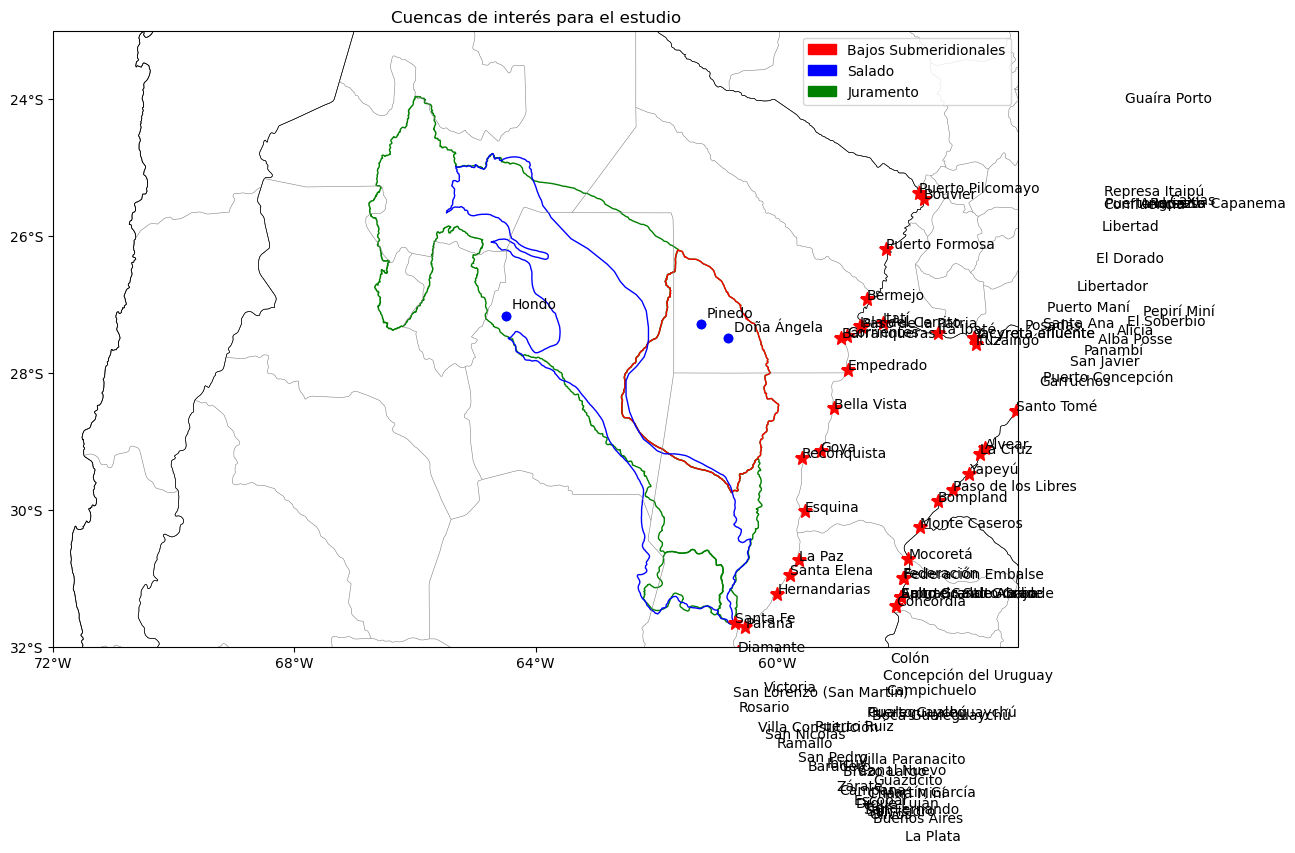

In [11]:
#ploteo los lugares que necesito

latsouth=-32
latnorth=-23
lonwest=-72
loneast=-56

#latsouth=-32
#latnorth=-28
#lonwest=-63
#loneast=-59
  
plt.figure(figsize=(20,8))

ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
                  #ploteo cada una de las cuencas

#for i in range(len(ubicacionEstaciones['Estacion'])):
#    plt.plot([ubicacionEstaciones['lon'][i],ubicacionEstaciones['lat'][i]], "*r", markersize=10)
#    plt.text([ubicacionEstaciones['lon'][i],ubicacionEstaciones['lat'][i]], ubicacionEstaciones['Estacion'][i])

    
cuencaJuramentoGeo.plot(ax=ax1, color='none', label='Juramento', edgecolor='green')


#---------------------------------------------------------
#cuencaJuramentoAltoSaltaGeo.plot(ax=ax1, color='none', label='JuramentoAltoSalta', edgecolor='brown')
#cuencaJuramentoMedioSaltaGeo.plot(ax=ax1, color='none', label='JuramentoMedioSalta', edgecolor='yellow')
#---------------------------------------------------------
plt.plot(-25.2644444,-65.38333333333334,"*r", markersize=10)

ax1.coastlines(resolution='10m',linewidth=0.6)
ax1.add_feature(countries,linewidth=0.4)
ax1.add_feature(states_provinces,linewidth=0.4)
ax1.set_yticks(np.arange(latsouth,latnorth,2), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax2 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
cuencaBajosGeo.plot(ax=ax2, color='none', label='Bajos_Submeridionales', edgecolor='red')

ax3 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
cuencaSaladoGeo.plot(ax=ax3,color='none', label='Salado', edgecolor='blue')

#me creo los labels para colocar en las leyendas
red_patch = mpatches.Patch(color='red', label='Bajos Submeridionales')
blue_patch = mpatches.Patch(color='blue', label='Salado')
green_patch = mpatches.Patch(color='green', label='Juramento')

for index, estacion in enumerate(ubicacionEstaciones['nombre']):
    plt.plot(ubicacionEstaciones['lon'][index],ubicacionEstaciones['lat'][index],"*r", markersize=10)
    plt.text(ubicacionEstaciones['lon'][index], ubicacionEstaciones['lat'][index], ubicacionEstaciones['nombre'][index])


coord_estaciones_y=np.array([-27.1626,-27.2887,-27.4963])
coord_estaciones_x=np.array([-64.4904,-61.2605,-60.8070])
legend_estaciones = ['Hondo', 'Pinedo', 'Doña Ángela']
legend_coords_x = coord_estaciones_x+0.1
legend_coords_y = coord_estaciones_y+0.1
coord_estacion_y = coord_estaciones_y+0.1
coord_estacion_x = coord_estaciones_x+0.1
plt.scatter(y=coord_estaciones_y,x=coord_estaciones_x)
plt.scatter(y=coord_estaciones_y,x=coord_estaciones_x,color='b')
plt.text(legend_coords_x[0], legend_coords_y[0], legend_estaciones[0])
plt.text(legend_coords_x[1], legend_coords_y[1], legend_estaciones[1])
plt.text(legend_coords_x[2], legend_coords_y[2], legend_estaciones[2])

plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.title("Cuencas de interés para el estudio")
#plt.savefig(f"{workspace}tesis/imagenes/mapa_ubicacion_estaciones_y_cuencas.jpg", bbox_inches='tight')


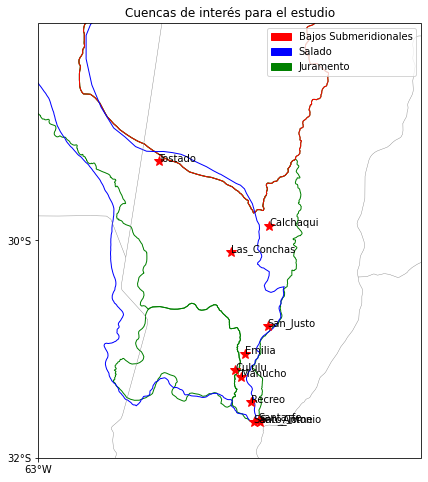

In [26]:
#ploteo los lugares que necesito

#latsouth=-32
#latnorth=-23
#lonwest=-72
#loneast=-56

latsouth=-32
latnorth=-28
lonwest=-63
loneast=-59
  
plt.figure(figsize=(20,8))

ax1 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())
                  #ploteo cada una de las cuencas

#for i in range(len(ubicacionEstaciones['Estacion'])):
#    plt.plot([ubicacionEstaciones['lon'][i],ubicacionEstaciones['lat'][i]], "*r", markersize=10)
#    plt.text([ubicacionEstaciones['lon'][i],ubicacionEstaciones['lat'][i]], ubicacionEstaciones['Estacion'][i])

    
cuencaJuramentoGeo.plot(ax=ax1, color='none', label='Juramento', edgecolor='green')


#---------------------------------------------------------
#cuencaJuramentoAltoSaltaGeo.plot(ax=ax1, color='none', label='JuramentoAltoSalta', edgecolor='brown')
#cuencaJuramentoMedioSaltaGeo.plot(ax=ax1, color='none', label='JuramentoMedioSalta', edgecolor='yellow')
#---------------------------------------------------------
plt.plot(-25.2644444,-65.38333333333334,"*r", markersize=10)

ax1.coastlines(resolution='10m',linewidth=0.6)
ax1.add_feature(countries,linewidth=0.4)
ax1.add_feature(states_provinces,linewidth=0.4)
ax1.set_yticks(np.arange(latsouth,latnorth,2), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,4), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax2 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
cuencaBajosGeo.plot(ax=ax2, color='none', label='Bajos_Submeridionales', edgecolor='red')

ax3 = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
cuencaSaladoGeo.plot(ax=ax3,color='none', label='Salado', edgecolor='blue')

#me creo los labels para colocar en las leyendas
red_patch = mpatches.Patch(color='red', label='Bajos Submeridionales')
blue_patch = mpatches.Patch(color='blue', label='Salado')
green_patch = mpatches.Patch(color='green', label='Juramento')

for index, estacion in enumerate(ubicacionEstaciones['Estacion']):
    plt.plot(ubicacionEstaciones['lon'][index],ubicacionEstaciones['lat'][index],"*r", markersize=10)
    plt.text(ubicacionEstaciones['lon'][index], ubicacionEstaciones['lat'][index], ubicacionEstaciones['Estacion'][index])



plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.title("Cuencas de interés para el estudio")

plt.savefig(f"{workspace}tesis/imagenes/mapa_ubicacion_estaciones_y_cuencas_zoom.jpg", bbox_inches='tight')
